In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
#Keras has few datasets for practice purpose

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Train Image Shape:", train_images.shape, "\nTrain Labels Shape:", train_labels.shape)
print("Test Image Shape:", test_images.shape, "\nTest Labels Shape:", test_labels.shape)

Train Image Shape: (60000, 28, 28) 
Train Labels Shape: (60000,)
Test Image Shape: (10000, 28, 28) 
Test Labels Shape: (10000,)


In [7]:
model_bad = Sequential([
    Flatten(),
    Dense(units = 5, activation='relu'),
    Dense(units = 5, activation='relu'),
    Dense(units = 10, activation='softmax')
])

model_bad.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

#model_bad.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model_bad.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3744 - accuracy: 0.2090
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4918 - accuracy: 0.4212
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1658 - accuracy: 0.5508
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0755 - accuracy: 0.6203
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0252 - accuracy: 0.6504


In [8]:
model_bad.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 5)                   3925      
_________________________________________________________________
dense_1 (Dense)              (32, 5)                   30        
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [9]:
#[loss, accuracy]
model_bad.evaluate(test_images, test_labels, verbose = 0)

[0.9636214971542358, 0.6827999949455261]

In [10]:
model_good = Sequential([
    Flatten(),
    Dense(units = 50, activation='relu'),
    Dense(units = 40, activation='relu'),
    Dense(units = 30, activation='relu'),
    Dense(units = 20, activation='relu'),
    Dense(units = 10, activation='softmax')
])

model_good.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

history = model_good.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3097 - accuracy: 0.7055
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.9222
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2041 - accuracy: 0.9427
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1690 - accuracy: 0.9517
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1549 - accuracy: 0.9568


In [ ]:
model_good.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_3 (Dense)              (32, 50)                  39250     
_________________________________________________________________
dense_4 (Dense)              (32, 40)                  2040      
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  1230      
_________________________________________________________________
dense_6 (Dense)              (32, 20)                  620       
_________________________________________________________________
dense_7 (Dense)              (32, 10)                  210       
Total params: 43,350
Trainable params: 43,350
Non-trainable params: 0
__________________________________________________

In [11]:
model_good.evaluate(test_images, test_labels, verbose = 0)

[0.18199893832206726, 0.955299973487854]

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def showImage(index, model):
    image = test_images[index]
    label = test_labels[index]
    figure = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

    print("Predicted Class: ", np.argmax(model.predict(test_images[[index], ...])))

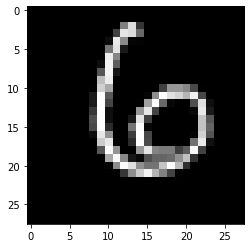

Predicted Class:  6


In [16]:
showImage(100, model_good)

In [ ]:
  model_cnn = Sequential([
                          Conv2D(8, kernel_size = 3, padding = 'SAME', activation = 'relu', input_shape = (28, 28, 1)),
                          MaxPooling2D(pool_size = 3),
                          Flatten(),
                          # Dense(10, activation = 'relu'),
                          # Dense(10, activation = 'relu'),
                          Dense(10, activation = 'softmax')
                          ])
model_cnn.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

#history = model_cnn.fit(train_images, train_labels, epochs = 5)

In [ ]:
scaled_train_images = train_images[..., np.newaxis]
scaled_test_images = test_images[..., np.newaxis]

In [ ]:
history = model_cnn.fit(scaled_train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 6.0256 - accuracy: 0.7957
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3366 - accuracy: 0.9469
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1399 - accuracy: 0.9625
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1015 - accuracy: 0.9698
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0883 - accuracy: 0.9727


In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 648)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                6490      
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________
